In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:\\Users\\Mubasshira\\Downloads\\ckd-dataset-v2.csv')
data.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete,discrete
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,class,meta
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12


In [3]:
#dropping 1st and 2nd rows
data.drop([0,1], inplace=True)
data.head()

,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.019 - 1.021,1 - 1,ckd,0,< 0,0,0,0,< 112,< 48.1,138 - 143,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
3,0,0,1.009 - 1.011,< 0,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,11.3 - 12.6,33.5 - 37.4,4.46 - 5.05,12120 - 14500,0,0,0,0,0,0,≥ 227.944,s1,1,< 12
4,0,0,1.009 - 1.011,≥ 4,ckd,1,< 0,1,0,1,< 112,48.1 - 86.2,133 - 138,< 3.65,< 7.31,8.7 - 10,29.6 - 33.5,4.46 - 5.05,14500 - 16880,0,0,0,1,0,0,127.281 - 152.446,s1,1,< 12
5,1,1,1.009 - 1.011,3 - 3,ckd,0,< 0,0,0,0,112 - 154,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,41.3 - 45.2,4.46 - 5.05,7360 - 9740,0,0,0,0,0,0,127.281 - 152.446,s1,1,< 12
6,0,0,1.015 - 1.017,< 0,ckd,0,< 0,0,0,0,154 - 196,< 48.1,133 - 138,< 3.65,< 7.31,13.9 - 15.2,37.4 - 41.3,5.05 - 5.64,7360 - 9740,0,1,0,1,1,0,127.281 - 152.446,s1,1,12 - 20


In [4]:
data.columns

Index(['bp (Diastolic)', 'bp limit', 'sg', 'al', 'class', 'rbc', 'su', 'pc',
       'pcc', 'ba', 'bgr', 'bu', 'sod', 'sc', 'pot', 'hemo', 'pcv', 'rbcc',
       'wbcc', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'grf', 'stage',
       'affected', 'age'],
      dtype='object')

In [5]:
#sg 
def map_sg_values(value):
    if value == '1.019 - 1.021':
        return 1.020
    if value == '1.009 - 1.011':
        return 1.010
    if value == '1.015 - 1.017':
        return 1.016
    if value == '≥ 1.023':
        return 1.023
    if value == '< 1.007':
        return 1.006
    else:
        return None
data['sg'] = data['sg'].apply(map_sg_values)

#al
data['al'].replace(['< 0', '2 - 2', '3 - 3', '1 - 1', '≥ 4'], [0, 2, 3, 1, 4], inplace=True)

#We're removing the "class" column since it duplicates the information in the "affected" column,
#both indicating whether the patient has chronic kidney disease. It's more efficient to retain numeric values,
#so we're dropping the categorical column "class".
data.drop(columns=['class'],inplace=True)

#su
replacement_dict = {'< 0': -1, '2 - 2': 2, '3 - 4': 3, '4 - 4': 4, '1 - 2': 1, '≥ 4': 4 }
data['su'].replace(replacement_dict, inplace = True)


#bgr - For range data we will use the average of the range
data['bgr'].replace(['112 - 154', '< 112', '196 - 238', '154 - 196', '238 - 280', '406 - 448', '280 - 322', '≥ 448', 
                    '364 - 406', '322 - 364'], [133, 122, 217, 175, 259, 427, 301, 448, 385, 343], inplace=True)

#bu - For range data we will use the average of the range
data['bu'].replace(['< 48.1', '48.1 - 86.2', '86.2 - 124.3', '124.3 - 162.4','200.5 - 238.6', '162.4 - 200.5', '≥ 352.9',
                   '238.6 - 276.7'],[48.0, 67.15, 105.25, 143.35, 219.55, 181.45, 352.9, 257.65], inplace=True)

#sod
def convert_range_to_average(range_str):
    if '<' in range_str:
        return float(range_str.split('<')[1].strip())
    elif '≥' in range_str:
        return float(range_str.split('≥')[1].strip())
    elif 'p' in range_str:
        return None
    else:
        lower, upper = map(float, range_str.split('-'))
        return (lower + upper) / 2

# Apply the function to convert the column to average
data['sod'] = data['sod'].apply(convert_range_to_average)

In [6]:
data['sc'] = data['sc'].apply(convert_range_to_average)

In [7]:
data['pot'] = data['pot'].apply(convert_range_to_average)

In [8]:
data['hemo'] = data['hemo'].apply(convert_range_to_average)

In [9]:
data['pcv'] = data['pcv'].apply(convert_range_to_average)

In [10]:
data['rbcc'] = data['rbcc'].apply(convert_range_to_average)

In [11]:
data['wbcc'] = data['wbcc'].apply(convert_range_to_average)

In [12]:
data['grf'] = data['grf'].apply(convert_range_to_average)

In [13]:
data['stage'].replace(['s1','s2','s3','s4','s5'],[1,2,3,4,5], inplace=True)

In [14]:
data['age'].value_counts()

age
59 - 66    48
66 - 74    34
51 - 59    33
43 - 51    31
27 - 35    14
35 - 43    12
20 - 27    10
≥ 74       10
< 12        4
12 - 20     4
Name: count, dtype: int64

In [15]:
def convert_range_to_average(range_str):
    if '<' in range_str:
        return 11
    elif '≥' in range_str:
        return int(range_str.split('≥')[1].strip())
    else:
        lower, upper = map(int, range_str.split('-'))
        return (lower + upper) // 2

# Apply the function to convert the age range to average age
data['age'] = data['age'].apply(convert_range_to_average)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  200 non-null    object 
 1   bp limit        200 non-null    object 
 2   sg              200 non-null    float64
 3   al              200 non-null    int64  
 4   rbc             200 non-null    object 
 5   su              200 non-null    int64  
 6   pc              200 non-null    object 
 7   pcc             200 non-null    object 
 8   ba              200 non-null    object 
 9   bgr             200 non-null    int64  
 10  bu              200 non-null    float64
 11  sod             200 non-null    float64
 12  sc              200 non-null    float64
 13  pot             200 non-null    float64
 14  hemo            200 non-null    float64
 15  pcv             200 non-null    float64
 16  rbcc            200 non-null    float64
 17  wbcc            200 non-null    flo

In [17]:
unique_values = {col: data[col].unique() for col in data.columns}

# Print unique values for each column
for col, values in unique_values.items():
    print(f"Unique values for column '{col}': {values}")

Unique values for column 'bp (Diastolic)': ['0' '1']
Unique values for column 'bp limit': ['0' '1' '2']
Unique values for column 'sg': [1.02  1.01  1.016 1.023 1.006]
Unique values for column 'al': [1 0 4 3 2]
Unique values for column 'rbc': ['0' '1']
Unique values for column 'su': [-1  4  2  3  1]
Unique values for column 'pc': ['0' '1']
Unique values for column 'pcc': ['0' '1']
Unique values for column 'ba': ['0' '1']
Unique values for column 'bgr': [122 133 175 427 259 217 448 301 385 343]
Unique values for column 'bu': [ 48.    67.15 219.55 143.35 105.25 181.45 352.9  257.65]
Unique values for column 'sod': [140.5 135.5 125.5 145.5 150.5 118.  130.5 120.5 158. ]
Unique values for column 'sc': [ 3.65   5.225 17.825  8.375 14.675 11.525 28.85 ]
Unique values for column 'pot': [ 7.31  42.59   9.515 40.385]
Unique values for column 'hemo': [11.95  9.35 14.55 16.5  10.65  8.05 13.25 15.85  6.1   6.75]
Unique values for column 'pcv': [35.45 31.55 43.25 39.35 49.1  23.75 47.15 17.9  27.65

In [18]:
columns_to_convert = ['age', 'affected', 'bp (Diastolic)', 'bp limit', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']
# Convert object columns to numeric
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 2 to 201
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  200 non-null    int64  
 1   bp limit        200 non-null    int64  
 2   sg              200 non-null    float64
 3   al              200 non-null    int64  
 4   rbc             200 non-null    int64  
 5   su              200 non-null    int64  
 6   pc              200 non-null    int64  
 7   pcc             200 non-null    int64  
 8   ba              200 non-null    int64  
 9   bgr             200 non-null    int64  
 10  bu              200 non-null    float64
 11  sod             200 non-null    float64
 12  sc              200 non-null    float64
 13  pot             200 non-null    float64
 14  hemo            200 non-null    float64
 15  pcv             200 non-null    float64
 16  rbcc            200 non-null    float64
 17  wbcc            200 non-null    flo

In [20]:
data.isnull().sum().sum()

1

In [21]:
data['grf'].fillna(data['grf'].mean(), inplace=True)

In [22]:
data.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.020,1,0,-1,0,0,0,122,48.00,140.5,3.65,7.31,11.95,35.45,4.755,8550.0,0,0,0,0,0,0,227.9440,1,1,11
3,0,0,1.010,0,0,-1,0,0,0,133,48.00,135.5,3.65,7.31,11.95,35.45,4.755,13310.0,0,0,0,0,0,0,227.9440,1,1,11
4,0,0,1.010,4,1,-1,1,0,1,122,67.15,135.5,3.65,7.31,9.35,31.55,4.755,15690.0,0,0,0,1,0,0,139.8635,1,1,11
5,1,1,1.010,3,0,-1,0,0,0,133,48.00,135.5,3.65,7.31,14.55,43.25,4.755,8550.0,0,0,0,0,0,0,139.8635,1,1,11
6,0,0,1.016,0,0,-1,0,0,0,175,48.00,135.5,3.65,7.31,14.55,39.35,5.345,8550.0,0,1,0,1,1,0,139.8635,1,1,16


**distribution of 'bgr' (blood glucose random) levels among patients**

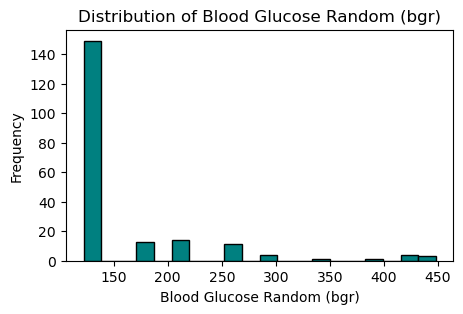

In [23]:
bgr_dist = data['bgr'].value_counts()
plt.figure(figsize=(5,3))
plt.hist(data['bgr'], bins=20, color='teal', edgecolor='black')
plt.xlabel('Blood Glucose Random (bgr)')
plt.ylabel('Frequency')
plt.title('Distribution of Blood Glucose Random (bgr)')
plt.show()

**Distribution of 'hemo' (hemoglobin) levels vary across different stages of kidney disease**

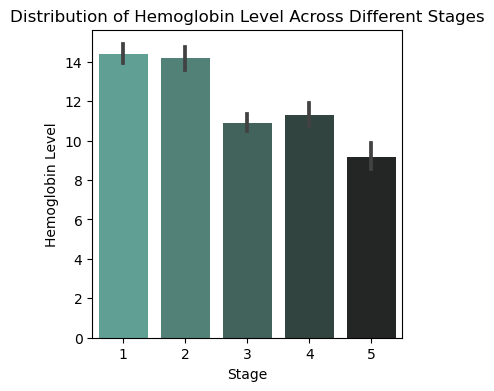

In [24]:
plt.figure(figsize=(4,4))
sns.barplot(x='stage', y='hemo', data=data, palette = 'dark:#5A9_r')
plt.xlabel('Stage')
plt.ylabel('Hemoglobin Level')
plt.title('Distribution of Hemoglobin Level Across Different Stages')
plt.show()

**Correlation between 'sod' (sodium) and 'pot' (potassium) levels**

**Does bu' (blood urea) correlate with 'sc' (serum creatinine) levels?**

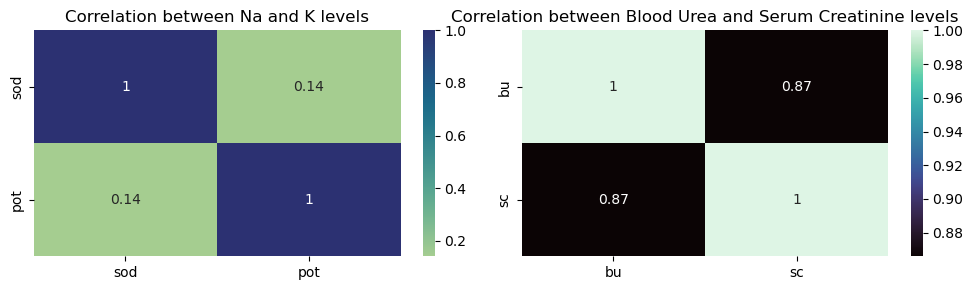

In [25]:
plt.figure(figsize=(10,3))  # Increase the figure width to accommodate both subplots
df = data[['sod','pot']]
plt.subplot(1,2,1)
sns.heatmap(df.corr(), cmap='crest', annot=True)
plt.title("Correlation between Na and K levels")

df2 = data[['bu', 'sc']]
plt.subplot(1,2,2)
sns.heatmap(df2.corr(), cmap='mako', annot=True)
plt.title("Correlation between Blood Urea and Serum Creatinine levels")

plt.tight_layout()  # Adjust spacing between subplots to avoid overlap
plt.show()


- weak positive Correlation between NA and K levels
- strong positive Correlation between Blood Urea and Serun Creatinine levels

**proportion of patients with hypertension ('htn') in each stage of kidney disease**

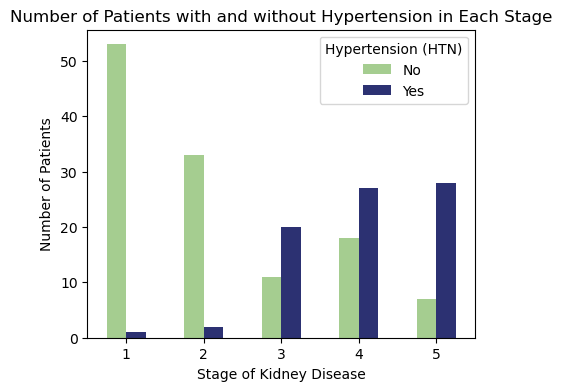

In [26]:
htn_stage_proportion = data.groupby(['stage', 'htn']).size().unstack(fill_value=0)

# Grouped bar chart
htn_stage_proportion.plot(kind='bar',cmap='crest',figsize=(5,4))
plt.xlabel('Stage of Kidney Disease')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with and without Hypertension in Each Stage')
plt.legend(title='Hypertension (HTN)', labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.show()

**How does the presence of diabetes mellitus ('dm') differ between affected and unaffected individuals?**

In [27]:
data.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.020,1,0,-1,0,0,0,122,48.00,140.5,3.65,7.31,11.95,35.45,4.755,8550.0,0,0,0,0,0,0,227.9440,1,1,11
3,0,0,1.010,0,0,-1,0,0,0,133,48.00,135.5,3.65,7.31,11.95,35.45,4.755,13310.0,0,0,0,0,0,0,227.9440,1,1,11
4,0,0,1.010,4,1,-1,1,0,1,122,67.15,135.5,3.65,7.31,9.35,31.55,4.755,15690.0,0,0,0,1,0,0,139.8635,1,1,11
5,1,1,1.010,3,0,-1,0,0,0,133,48.00,135.5,3.65,7.31,14.55,43.25,4.755,8550.0,0,0,0,0,0,0,139.8635,1,1,11
6,0,0,1.016,0,0,-1,0,0,0,175,48.00,135.5,3.65,7.31,14.55,39.35,5.345,8550.0,0,1,0,1,1,0,139.8635,1,1,16


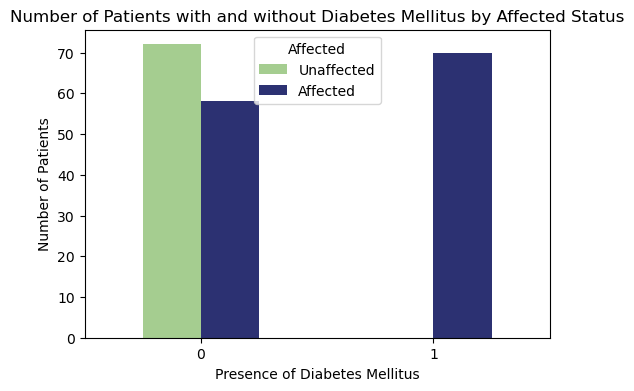

In [28]:
dm_affected_proportion = data.groupby(['dm', 'affected']).size().unstack()

# Grouped bar chart
dm_affected_proportion.plot(kind='bar', cmap='crest', figsize=(6,4))
plt.xlabel('Presence of Diabetes Mellitus')
plt.ylabel('Number of Patients')
plt.title('Number of Patients with and without Diabetes Mellitus by Affected Status')
plt.legend(title='Affected', labels=['Unaffected', 'Affected'],loc = 9)
plt.xticks(rotation=0)
plt.show()


**Average 'hemo' levels between patients with and without anemia**

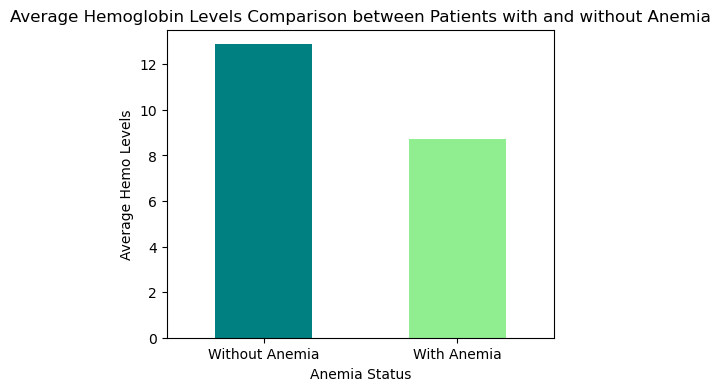

In [29]:
hemo_anemia_comparison = data.groupby('ane')['hemo'].mean()

ax = hemo_anemia_comparison.plot(kind='bar', color=['teal', 'lightgreen'] , figsize=(5,4))
ax.set_xlabel('Anemia Status')
ax.set_ylabel('Average Hemo Levels')
ax.set_title('Average Hemoglobin Levels Comparison between Patients with and without Anemia')
ax.set_xticks(range(len(hemo_anemia_comparison)))
ax.set_xticklabels(['Without Anemia', 'With Anemia'], rotation=0)
plt.show()

**Analyze the difference in 'age' distribution between patients with and without hypertension ('htn').**

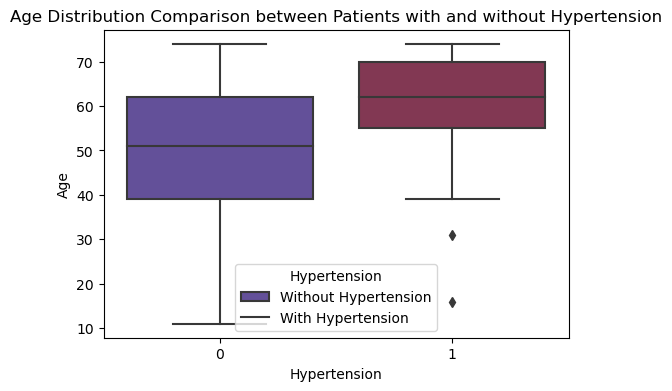

In [30]:
plt.figure(figsize=(6,4))
sns.boxplot(x='htn', y='age', data=data,palette='twilight')
plt.title('Age Distribution Comparison between Patients with and without Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Age')
plt.legend(title='Hypertension', labels=['Without Hypertension', 'With Hypertension'], loc=8)

plt.show()

**How have 'rbcc' (red blood cell count) levels changed over different stages of kidney disease?**

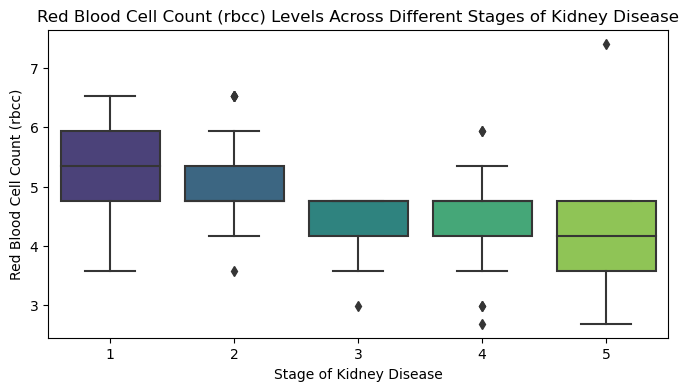

In [31]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='stage', y='rbcc', data=data,palette='viridis')
plt.title('Red Blood Cell Count (rbcc) Levels Across Different Stages of Kidney Disease')
plt.xlabel('Stage of Kidney Disease')
plt.ylabel('Red Blood Cell Count (rbcc)')
plt.show()


**Are there any outliers in the 'sc' (serum creatinine) levels? How do they compare across different stages of kidney disease?**

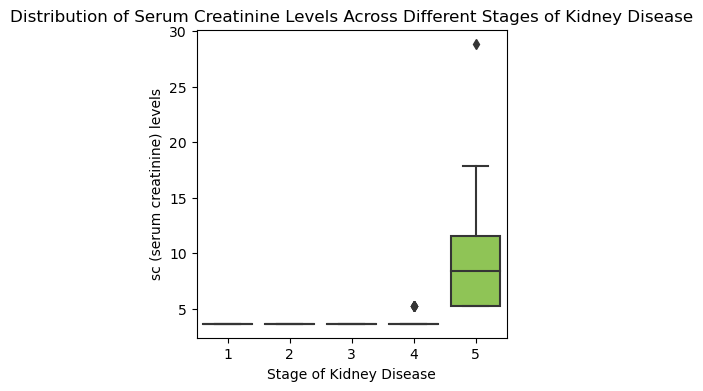

In [32]:
plt.figure(figsize=(4,4))
sns.boxplot(x='stage', y='sc', data=data, palette='viridis',orient='v')
plt.title('Distribution of Serum Creatinine Levels Across Different Stages of Kidney Disease')
plt.xlabel('Stage of Kidney Disease')
plt.ylabel('sc (serum creatinine) levels')
plt.show()


In [33]:
data.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.020,1,0,-1,0,0,0,122,48.00,140.5,3.65,7.31,11.95,35.45,4.755,8550.0,0,0,0,0,0,0,227.9440,1,1,11
3,0,0,1.010,0,0,-1,0,0,0,133,48.00,135.5,3.65,7.31,11.95,35.45,4.755,13310.0,0,0,0,0,0,0,227.9440,1,1,11
4,0,0,1.010,4,1,-1,1,0,1,122,67.15,135.5,3.65,7.31,9.35,31.55,4.755,15690.0,0,0,0,1,0,0,139.8635,1,1,11
5,1,1,1.010,3,0,-1,0,0,0,133,48.00,135.5,3.65,7.31,14.55,43.25,4.755,8550.0,0,0,0,0,0,0,139.8635,1,1,11
6,0,0,1.016,0,0,-1,0,0,0,175,48.00,135.5,3.65,7.31,14.55,39.35,5.345,8550.0,0,1,0,1,1,0,139.8635,1,1,16


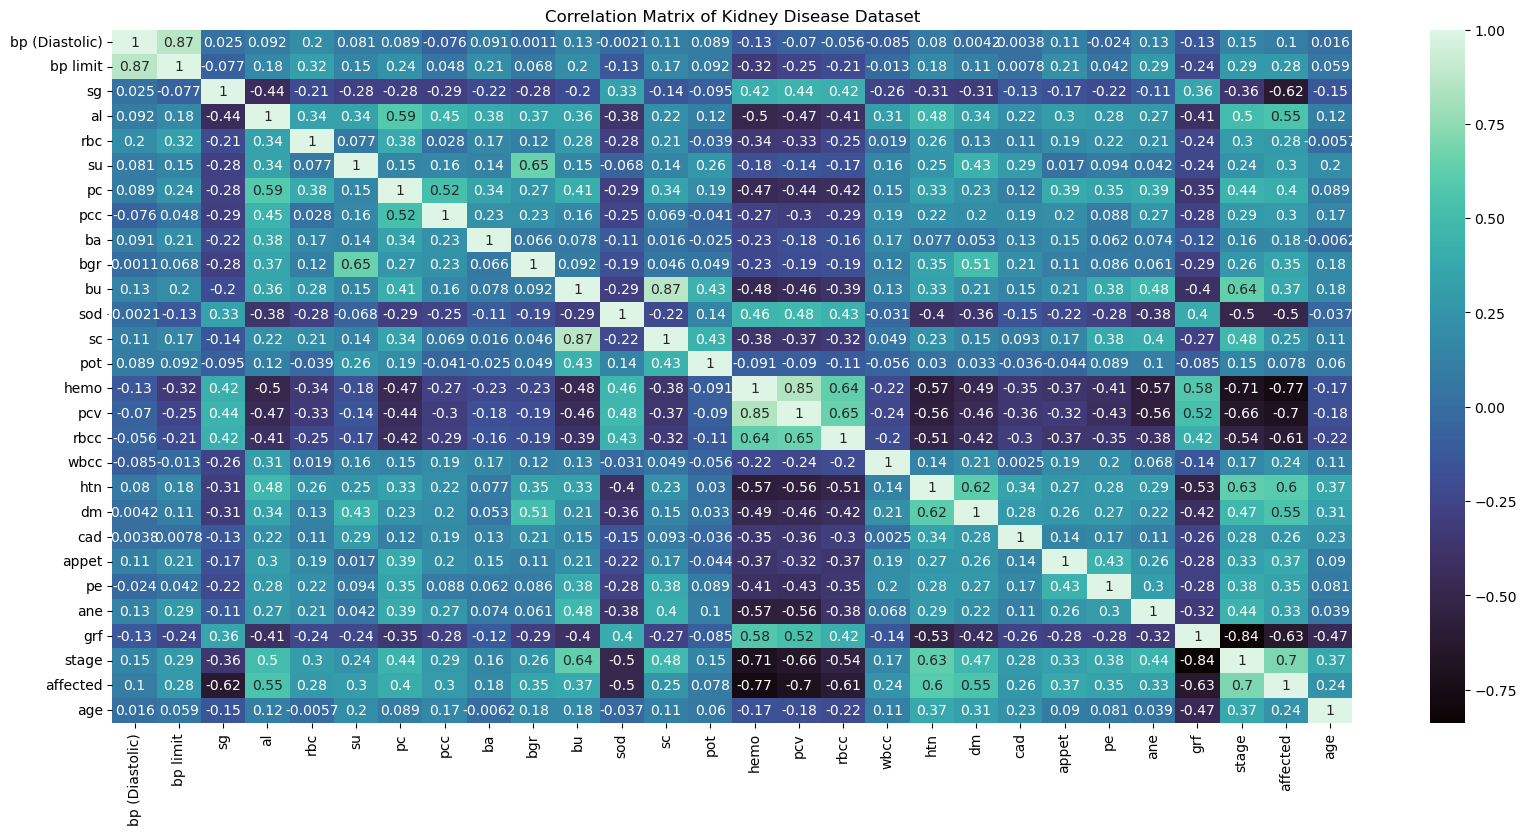

In [34]:
plt.figure(figsize=(20,9))
sns.heatmap(data.corr(),annot=True,cmap='mako')
plt.title('Correlation Matrix of Kidney Disease Dataset')
plt.show()

In [35]:
data.corr()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
bp (Diastolic),1.000000,0.867676,0.024830,0.091965,0.197173,0.081388,0.088890,-0.075742,0.090649,0.001097,0.133598,-0.002129,0.105464,0.089137,-0.132844,-0.069658,-0.055503,-0.084879,0.079805,0.004207,0.003848,0.110354,-0.023762,0.129163,-0.127145,0.150978,0.101994,0.015654
bp limit,0.867676,1.000000,-0.076514,0.178445,0.322381,0.150071,0.238921,0.047643,0.210141,0.067669,0.200801,-0.129687,0.174203,0.092088,-0.322233,-0.249197,-0.211596,-0.013062,0.180106,0.106381,0.007760,0.214792,0.042192,0.285984,-0.236352,0.288625,0.277050,0.059029
sg,0.024830,-0.076514,1.000000,-0.435614,-0.214411,-0.284192,-0.280018,-0.288460,-0.215794,-0.284615,-0.195902,0.329472,-0.144387,-0.094623,0.424414,0.441927,0.422550,-0.260772,-0.305919,-0.313955,-0.126912,-0.165757,-0.217375,-0.109299,0.359044,-0.359205,-0.621330,-0.146947
al,0.091965,0.178445,-0.435614,1.000000,0.336222,0.344218,0.585822,0.447169,0.383909,0.365452,0.360111,-0.377703,0.222665,0.123614,-0.497136,-0.465720,-0.410913,0.309996,0.475734,0.342975,0.222143,0.299661,0.284708,0.273904,-0.405585,0.498634,0.554090,0.122772
rbc,0.197173,0.322381,-0.214411,0.336222,1.000000,0.076943,0.375627,0.027651,0.174078,0.120887,0.278022,-0.278505,0.205736,-0.039163,-0.340164,-0.327092,-0.247907,0.018555,0.255722,0.134713,0.108718,0.188982,0.223814,0.206197,-0.235506,0.303435,0.283473,-0.005735
su,0.081388,0.150071,-0.284192,0.344218,0.076943,1.000000,0.154827,0.162058,0.135098,0.651897,0.154858,-0.068194,0.143725,0.261325,-0.184363,-0.142212,-0.165346,0.156919,0.252432,0.433917,0.293261,0.016964,0.093758,0.041544,-0.236533,0.240683,0.299704,0.202541
pc,0.088890,0.238921,-0.280018,0.585822,0.375627,0.154827,1.000000,0.522959,0.342698,0.266346,0.413169,-0.291625,0.339375,0.192305,-0.466364,-0.439631,-0.423404,0.151166,0.330182,0.232209,0.116718,0.389145,0.350576,0.385399,-0.349335,0.442345,0.404112,0.088725
pcc,-0.075742,0.047643,-0.288460,0.447169,0.027651,0.162058,0.522959,1.000000,0.225592,0.234852,0.161585,-0.249468,0.068623,-0.040934,-0.271751,-0.303082,-0.290072,0.190782,0.224088,0.200930,0.188455,0.204844,0.087605,0.266607,-0.276218,0.286496,0.296292,0.165518
ba,0.090649,0.210141,-0.215794,0.383909,0.174078,0.135098,0.342698,0.225592,1.000000,0.066396,0.078094,-0.106056,0.015556,-0.024997,-0.230298,-0.183027,-0.161593,0.170250,0.076890,0.052879,0.125468,0.153522,0.062049,0.074181,-0.115227,0.157270,0.180937,-0.006157
bgr,0.001097,0.067669,-0.284615,0.365452,0.120887,0.651897,0.266346,0.234852,0.066396,1.000000,0.091553,-0.190451,0.045607,0.048613,-0.230786,-0.194209,-0.191268,0.116286,0.345627,0.507519,0.205468,0.108826,0.086048,0.061176,-0.288041,0.262405,0.352781,0.178035


- bp (Diastolic) and bp limit: These variables have a correlation coefficient of approximately 0.87, indicating a strong positive correlation. It suggests that as diastolic blood pressure increases, the blood pressure limit also tends to increase.



- sg (specific gravity) and al (albumin): With a correlation coefficient of around -0.44, there is a moderate negative correlation between specific gravity and albumin levels. This implies that as specific gravity increases, indicating higher urine concentration, albumin levels tend to decrease.



- sg (specific gravity) and pcv (packed cell volume): These variables have a correlation coefficient of approximately 0.42, indicating a moderate positive correlation. It suggests that as specific gravity increases, indicating higher urine concentration, packed cell volume also tends to increase.



- hemo (hemoglobin) and pcv (packed cell volume): There is a strong positive correlation of about 0.85 between hemoglobin and packed cell volume. This suggests that as hemoglobin levels increase, packed cell volume tends to increase as well.

In [36]:
data.head()

,bp (Diastolic),bp limit,sg,al,rbc,su,pc,pcc,ba,bgr,bu,sod,sc,pot,hemo,pcv,rbcc,wbcc,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
2,0,0,1.020,1,0,-1,0,0,0,122,48.00,140.5,3.65,7.31,11.95,35.45,4.755,8550.0,0,0,0,0,0,0,227.9440,1,1,11
3,0,0,1.010,0,0,-1,0,0,0,133,48.00,135.5,3.65,7.31,11.95,35.45,4.755,13310.0,0,0,0,0,0,0,227.9440,1,1,11
4,0,0,1.010,4,1,-1,1,0,1,122,67.15,135.5,3.65,7.31,9.35,31.55,4.755,15690.0,0,0,0,1,0,0,139.8635,1,1,11
5,1,1,1.010,3,0,-1,0,0,0,133,48.00,135.5,3.65,7.31,14.55,43.25,4.755,8550.0,0,0,0,0,0,0,139.8635,1,1,11
6,0,0,1.016,0,0,-1,0,0,0,175,48.00,135.5,3.65,7.31,14.55,39.35,5.345,8550.0,0,1,0,1,1,0,139.8635,1,1,16


In [37]:
from scipy.stats import f_oneway


for col in data.columns:
    if col != 'affected':  # Skip the target column
        # Perform ANOVA test
        stat, p_value = f_oneway(data[col][data['affected'] == 0], data[col][data['affected'] == 1])
        
        # Print the result
        print(f'ANOVA test for {col}: p-value = {p_value}')


ANOVA test for bp (Diastolic): p-value = 0.15068496287417726
ANOVA test for bp limit: p-value = 7.140728580853441e-05
ANOVA test for sg: p-value = 9.582159516753212e-23
ANOVA test for al: p-value = 1.7231263926184933e-17
ANOVA test for rbc: p-value = 4.751166301310339e-05
ANOVA test for su: p-value = 1.62221128715802e-05
ANOVA test for pc: p-value = 2.952142250709003e-09
ANOVA test for pcc: p-value = 2.044381798445854e-05
ANOVA test for ba: p-value = 0.010347634601968319
ANOVA test for bgr: p-value = 2.9992378267270055e-07
ANOVA test for bu: p-value = 5.835383559343879e-08
ANOVA test for sod: p-value = 6.275901887129112e-14
ANOVA test for sc: p-value = 0.00032685924129246597
ANOVA test for pot: p-value = 0.27404750625049423
ANOVA test for hemo: p-value = 2.8776968452105308e-40
ANOVA test for pcv: p-value = 2.686325081052188e-30
ANOVA test for rbcc: p-value = 1.6880572232980935e-21
ANOVA test for wbcc: p-value = 0.0006333948454123494
ANOVA test for htn: p-value = 6.425919017071286e-21
A

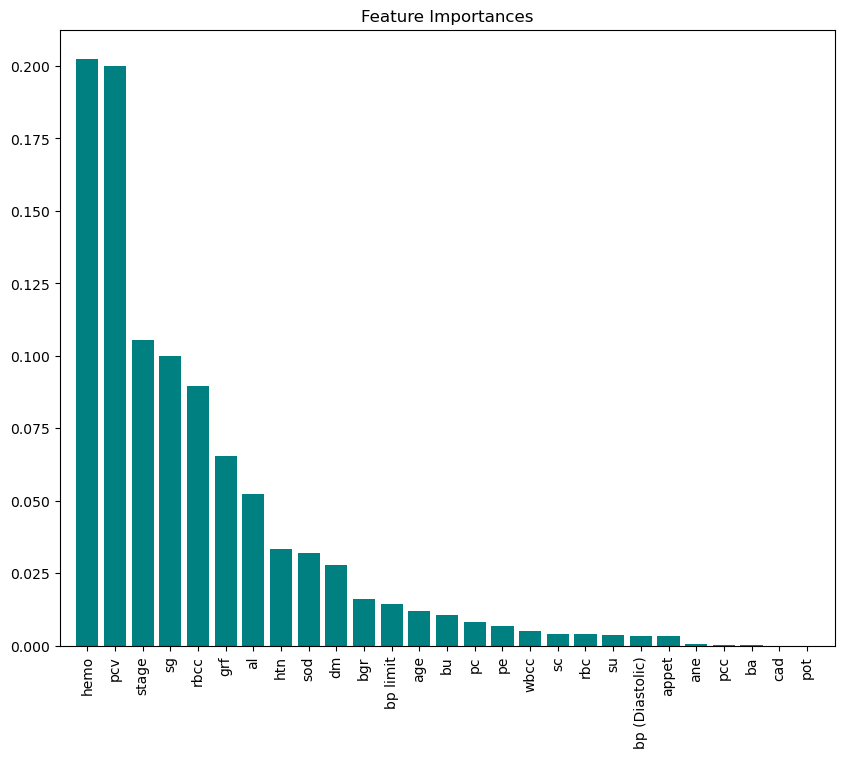

In [59]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop(columns=['affected'])  # Features
y = data['affected']  # Target
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)
feature_importances = rf_classifier.feature_importances_
indices = feature_importances.argsort()[::-1]

plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), feature_importances[indices], align='center',color='teal')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()


In [39]:
top_features = X.columns[indices][:10]
X_top = X[top_features]

# Re-fitting the Random Forest classifier with only the top 10 features
rf_classifier.fit(X_top, y)


RandomForestClassifier()

In [45]:
X_top

,hemo,stage,grf,sg,pcv,al,rbcc,htn,sod,bgr
2,11.95,1,227.94400,1.020,35.45,1,4.755,0,140.5,122
3,11.95,1,227.94400,1.010,35.45,0,4.755,0,135.5,133
4,9.35,1,139.86350,1.010,31.55,4,4.755,0,135.5,122
5,14.55,1,139.86350,1.010,43.25,3,4.755,0,135.5,133
6,14.55,1,139.86350,1.016,39.35,0,5.345,0,135.5,175
...,...,...,...,...,...,...,...,...,...,...
197,9.35,3,39.20035,1.020,31.55,0,4.755,1,140.5,175
198,8.05,4,26.61750,1.020,23.75,0,4.755,0,135.5,133
199,15.85,2,64.36610,1.023,39.35,0,6.525,0,145.5,122
200,14.55,1,114.69800,1.023,47.15,0,4.755,0,140.5,133


R2 Score: 1.0
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        25

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



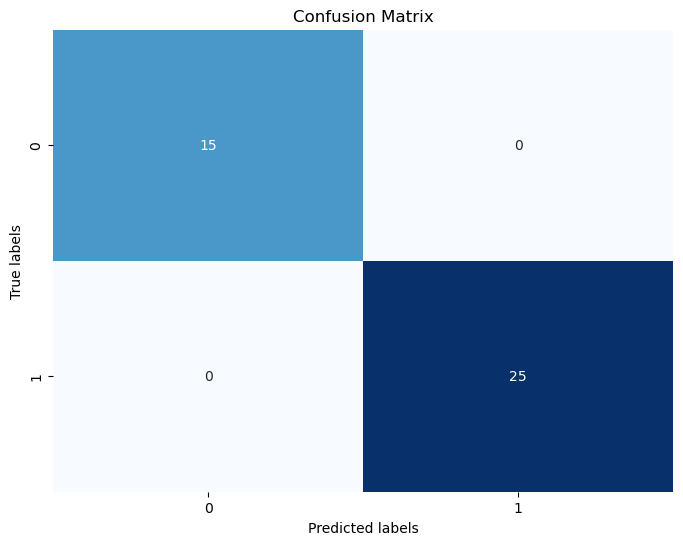

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_top, y, test_size=0.2, random_state=42)
y_pred = rf_classifier.predict(X_test)


from sklearn.metrics import accuracy_score, classification_report, r2_score,confusion_matrix

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


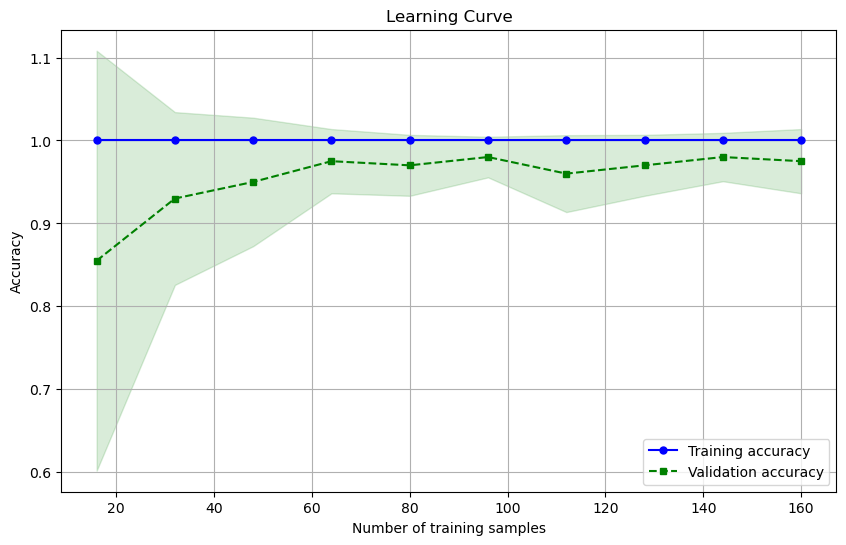

In [41]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_classifier,  # RandomForestClassifier instance
    X=X_top,  # Features
    y=y,  # Target variable
    train_sizes=np.linspace(0.1, 1.0, 10),  # Specify the training set sizes
    cv=5  # Number of cross-validation folds
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Learning Curve')
plt.grid()
plt.show()
